# Bongiorno, Micciche \& Mantegna 
Currently an attempt at replicating the output of their paper titled: 'Statistically validated hierarchical clustering: Nested partitions in hierarchical trees' (2022)

In [3]:
# Initialising
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Generating factor loading matrices - best option right now 
def generate_factor_loading_matrix(N, S, block_sizes, loading_value):
    factor_loading_matrix = np.zeros((N, S))

    current_row = 0
    current_block = 0

    for block_size in block_sizes:
        if current_row != N:
            factor_loading_matrix[current_row : current_row + block_size, current_block] = loading_value
            current_row += block_size
            current_block += 1
        else:
            current_row = 0
            factor_loading_matrix[current_row : current_row + block_size, current_block] = loading_value
            current_row += block_size
            current_block += 1
        
    return factor_loading_matrix

# Parameters
N = 100  # Number of variables
S = 12   # Number of factors
block_sizes = [100, 50, 25, 25, 25, 10, 15, 15, 5, 10, 10, 5]  # Block sizes
loading_value = 0.4  # Magnitude of factor loadings

# Generate factor loading matrix
factor_loading_matrix = generate_factor_loading_matrix(N, S, block_sizes, loading_value)

# Print the factor loading matrix shape and an example
print("Factor Loading Matrix shape:", factor_loading_matrix.shape)
print("Example Factor Loading Matrix:")
print(factor_loading_matrix)


Factor Loading Matrix shape: (100, 12)
Example Factor Loading Matrix:
[[0.4 0.4 0.  ... 0.  0.  0. ]
 [0.4 0.4 0.  ... 0.  0.  0. ]
 [0.4 0.4 0.  ... 0.  0.  0. ]
 ...
 [0.4 0.  0.  ... 0.  0.  0. ]
 [0.4 0.  0.  ... 0.  0.  0. ]
 [0.4 0.  0.  ... 0.  0.  0. ]]


In [11]:
# Parameters
matrix_shape = (100, 12)
block_sizes = [100, 50, 25, 25, 25, 10, 15, 15, 5, 10, 10, 5]  # Block sizes
block_value = 0.4  # Value in the blocks
depth = 3

# Create the matrix
matrix = np.zeros(matrix_shape)
current_column = 0
current_row = 0
current_depth = 0

for block_size in block_sizes:
    if current_row != 100:
        matrix[current_row:block_size, current_column] = block_value
        current_row += block_size
        current_column += 1
    current_row = 0
    
#     if current_row < 100:
#         matrix[current_row:block_size, current_column] = block_value
#         current_column += 1
#         current_row += 
#     current_row = 0
    

# Print the matrix shape and the matrix itself
# print("Matrix shape:", matrix.shape)
# print("Matrix:")
# print(matrix)



100
50
25
25
25
10
15
15
5
10
10
5


In [22]:
import numpy as np

# Parameters
num_stocks = 100
num_factors = 12
block_sizes = [100, 50, 25, 25, 25, 10, 15, 15, 5, 10, 10, 5]
num_depths = 4

# Generate the factor loading matrix
factor_loading_matrix = np.zeros((num_stocks, num_factors))

current_stock = 0
for block_size in block_sizes:
    stocks_per_depth = block_size // num_depths
    for depth in range(num_depths):
        start_stock = current_stock
        end_stock = current_stock + stocks_per_depth
        factor_loading_matrix[start_stock:end_stock, current_stock % num_factors] = 0.4
        current_stock = end_stock

# Print the factor loading matrix shape and an example
print("Factor Loading Matrix shape:", factor_loading_matrix.shape)
print("Example Factor Loading Matrix:")
print(factor_loading_matrix)




Factor Loading Matrix shape: (100, 12)
Example Factor Loading Matrix:
[[0.4 0.  0.  ... 0.  0.  0. ]
 [0.4 0.  0.  ... 0.  0.  0. ]
 [0.4 0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [27]:
import numpy as np

# Parameters
num_stocks = 100
num_factors = 12
block_sizes = [100, 50, 25, 25, 25, 10, 15, 15, 5, 10, 10, 5]
num_levels = 4
sensitivity = 0.4

# Create the factor sensitivity matrix
factor_sensitivity_matrix = np.zeros((num_stocks, num_factors))

current_stock = 0
for level in range(num_levels):
    for block_size in block_sizes:
        for stock in range(current_stock, current_stock + block_size):
            factor_sensitivity_matrix[stock, level] = sensitivity
        current_stock += block_size

# Print the factor sensitivity matrix shape and an example
print("Factor Sensitivity Matrix shape:", factor_sensitivity_matrix.shape)
print("Example Factor Sensitivity Matrix:")
print(factor_sensitivity_matrix)

IndexError: index 100 is out of bounds for axis 0 with size 100

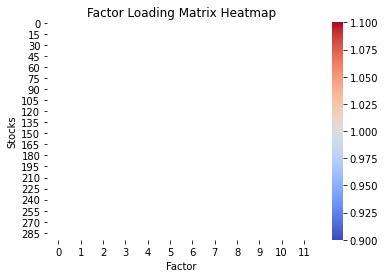

In [26]:
# Generate the heatmap
sns.heatmap(factor_sensitivity_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Set plot title and labels
plt.title('Factor Loading Matrix Heatmap')
plt.xlabel('Factor')
plt.ylabel('Stocks')

# Display the heatmap
plt.show()

In [16]:
def generate_dataset(N, M, S):
    # Factor loading matrix P
    # P = np.full((N, S), 0.4)
    P = factor_loading_matrix

    # Factor score matrix A
    A = np.random.normal(0, 1, size=(S, M))
    A = A / np.std(A, axis=1, ddof=1).reshape(-1, 1)  # Standardize factor scores

    # Uniqueness vector ui
    ui = 1 - np.sum(P**2, axis=1)

    # Generate dataset
    dataset = np.dot(P, A) + np.random.normal(0, 1, size=(N, M))
    
    #return dataset
    return dataset

# Parameters
N = 100  # Number of variables
M = 500  # Number of records
S = 12   # Number of factors

# Generate dataset
dataset = generate_dataset(N, M, S)

# Print the dataset shape
print("Dataset shape:", dataset.shape)

dataset


Dataset shape: (100, 500)


array([[-1.2118813 ,  0.16312431,  1.27899789, ..., -2.8224276 ,
        -0.70404066, -0.24286928],
       [-1.0363083 , -0.86976492, -0.11893967, ..., -0.61724859,
        -1.10315865, -0.65125881],
       [ 0.61850379,  0.45294912,  1.074835  , ..., -2.08875789,
        -2.50234125,  0.98906133],
       ...,
       [-0.63276465,  0.24474519,  0.17824271, ...,  0.45112512,
        -0.29396109, -0.53291876],
       [ 0.95136484,  0.42201772,  0.9680547 , ...,  0.40121544,
         0.64062512,  0.81516314],
       [-0.37078616, -1.03715618, -0.1262042 , ..., -0.1167318 ,
         0.28751862,  0.93610894]])

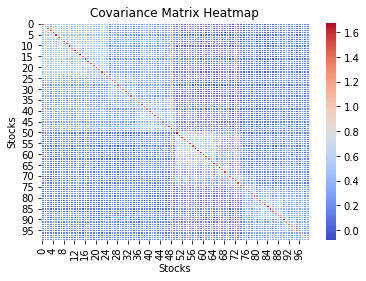

In [17]:
# Compute the covariance matrix
cov_matrix = np.cov(dataset)

# Generate the heatmap
sns.heatmap(cov_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Set plot title and labels
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Stocks')
plt.ylabel('Stocks')

# Display the heatmap
plt.show()

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import scipy.stats as st
import sys
import pandas as pd

def gramschmidt(X, row_vecs=True, norm = True):
    if not row_vecs:
        X = X.T
    Y = X[0:1,:].copy()
    for i in range(1, X.shape[0]):
        proj = np.diag((X[i,:].dot(Y.T)/np.linalg.norm(Y,axis=1)**2).flat).dot(Y)
        Y = np.vstack((Y, X[i,:] - proj.sum(0)))
    if norm:
        Y = np.diag(1/np.linalg.norm(Y,axis=1)).dot(Y)
    if row_vecs:
        return Y
    else:
        return Y.T

def CREATE_DATA(P,T=1000,noise=0.,com_ortho=True):
    N = P.shape[0]

    U = np.diag(np.sqrt(1-(P**2).sum(axis=1)))

    B = np.hstack((P,U))

    A = st.norm.rvs(0,1,size=(B.shape[1],T))
    if com_ortho==True:
		A[:P.shape[1]] = _gs(A[:P.shape[1]])
    A =  A/np.linalg.norm(A,axis=1)[np.newaxis].T

    X = np.dot(B,A)
    
    com = map(lambda x:np.where(x)[0],(P>0).T)
    X = st.zscore(X,axis=1)
    
    X = (1.-noise)*X + noise*st.norm.rvs(0,1,size=X.shape)
    
    return X,com

	
	

In [39]:
import numpy as np

def generate_hcmb_mat(t_samples, n_size, rho_low=0.1, rho_high=0.9, blocks=4, depth=4, permute=False):
    matrices = []

    for _ in range(t_samples):
        matrix = np.zeros((n_size, n_size))
        block_values = generate_block_values(blocks, depth, rho_low, rho_high)
        fill_matrix(matrix, block_values, 0, n_size - 1, 0, n_size - 1)

        if permute:
            permuted_matrix = permute_matrix(matrix)
            matrices.append(permuted_matrix)
        else:
            matrices.append(matrix)

    return np.array(matrices)

def generate_block_values(blocks, depth, rho_low, rho_high):
    if depth == 0:
        return [np.random.uniform(rho_low, rho_high)]

    values = []
    for _ in range(blocks):
        sub_values = generate_block_values(blocks, depth - 1, rho_low, rho_high)
        values.extend(sub_values)

    return values

def fill_matrix(matrix, block_values, row_start, row_end, col_start, col_end):
    if len(block_values) == 1:
        matrix[row_start:row_end + 1, col_start:col_end + 1] = block_values[0]
    else:
        block_size = row_end - row_start + 1
        sub_size = block_size // len(block_values)
        sub_col_start = col_start
        sub_col_end = sub_col_start + sub_size - 1

        for i in range(len(block_values)):
            sub_row_start = row_start + i * sub_size
            sub_row_end = sub_row_start + sub_size - 1
            sub_values = block_values[i]
            fill_matrix(matrix, sub_values, sub_row_start, sub_row_end, sub_col_start, sub_col_end)
            sub_col_start = sub_col_end + 1
            sub_col_end = sub_col_start + sub_size - 1

def permute_matrix(matrix):
    n_size = matrix.shape[0]
    permutation = np.random.permutation(n_size)
    permuted_matrix = matrix[:, permutation]
    permuted_matrix = permuted_matrix[permutation, :]
    return permuted_matrix

# Example usage
t_samples = 3
n_size = 8
rho_low = 0.1
rho_high = 0.9
blocks = 4
depth = 4
permute = True

hcbm_matrices = generate_hcmb_mat(t_samples, n_size, rho_low, rho_high, blocks, depth, permute)
for matrix in hcbm_matrices:
    print(matrix)
    print()





TypeError: object of type 'float' has no len()

In [36]:
import numpy as np

def create_nested_factor_sensitivity_matrix(block_sizes, factor_sensitivities):
    n_variables = sum(sum(level) for level in block_sizes)
    n_factors = len(factor_sensitivities)
    n_levels = len(block_sizes)

    factor_sensitivity_matrix = np.zeros((n_variables, n_factors))

    variable_idx = 0
    for level in range(n_levels):
        level_block_sizes = block_sizes[level]
        n_blocks = len(level_block_sizes)

        for block_idx in range(n_blocks):
            block_size = level_block_sizes[block_idx]
            sensitivity = factor_sensitivities[block_idx]

            factor_sensitivity_matrix[variable_idx:variable_idx+block_size, level] = sensitivity

            variable_idx += block_size

    return factor_sensitivity_matrix

# Define the sizes for each block at each level
block_sizes = [[8, 5], [4, 3], [2, 1]]

# Define the factor sensitivities for each block
factor_sensitivities = [0.8, 0.6, 0.4, 0.2, 0.1]

# Create the nested factor sensitivity matrix
factor_sensitivity_matrix = create_nested_factor_sensitivity_matrix(block_sizes, factor_sensitivities)

print(factor_sensitivity_matrix)


[[0.8 0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0. ]
 [0.  0.8 0.  0.  0. ]
 [0.  0.8 0.  0.  0. ]
 [0.  0.8 0.  0.  0. ]
 [0.  0.8 0.  0.  0. ]
 [0.  0.6 0.  0.  0. ]
 [0.  0.6 0.  0.  0. ]
 [0.  0.6 0.  0.  0. ]
 [0.  0.  0.8 0.  0. ]
 [0.  0.  0.8 0.  0. ]
 [0.  0.  0.6 0.  0. ]]


In [30]:
import numpy as np

def create_factor_loading_matrix(block_sizes):
    n_variables = sum(block_sizes)
    n_levels = len(block_sizes)

    factor_loading_matrix = np.zeros((n_variables, n_levels))

    start_idx = 0
    for level in range(n_levels):
        block_size = block_sizes[level][0]
        factor_loading_matrix[start_idx:start_idx+block_size, level] = 1
        start_idx += block_size

    return factor_loading_matrix

# Define the sizes for each block at each level
block_sizes = [[8, 5], [4, 3], [2, 1]]

# Create the factor loading matrix
factor_loading_matrix = create_factor_loading_matrix(block_sizes)

print(factor_loading_matrix)


TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [33]:
import numpy as np

def create_nested_factor_sensitivity_matrix(block_sizes, factor_sensitivities):
    n_variables = sum(sum(level) for level in block_sizes)
    n_factors = len(factor_sensitivities)
    n_levels = len(block_sizes)

    factor_sensitivity_matrix = np.zeros((n_variables, n_factors))

    start_idx = 0
    for level in range(n_levels):
        level_block_sizes = block_sizes[level]
        n_blocks = len(level_block_sizes)
        block_factor_sensitivities = factor_sensitivities[:n_blocks]
        factor_sensitivities = factor_sensitivities[n_blocks:]
        for i in range(n_blocks):
            block_start_idx = start_idx + sum(level_block_sizes[:i])
            block_end_idx = block_start_idx + level_block_sizes[i]
            factor_sensitivity_matrix[block_start_idx:block_end_idx, i] = block_factor_sensitivities[i]

        start_idx += sum(level_block_sizes)

    return factor_sensitivity_matrix

# Define the sizes for each block at each level
block_sizes = [[8, 5], [4, 3], [2, 1]]

# Define the factor sensitivities for each block
factor_sensitivities = [0.8, 0.6, 0.4, 0.2, 0.1]

# Create the nested factor sensitivity matrix
factor_sensitivity_matrix = create_nested_factor_sensitivity_matrix(block_sizes, factor_sensitivities)

print(factor_sensitivity_matrix)


IndexError: list index out of range

In [34]:
import numpy as np

def create_nested_factor_sensitivity_matrix(block_sizes, factor_sensitivities):
    n_variables = sum(sum(level) for level in block_sizes)
    n_factors = len(factor_sensitivities)
    n_levels = len(block_sizes)

    factor_sensitivity_matrix = np.zeros((n_variables, n_factors))

    start_idx = 0
    for level in range(n_levels):
        level_block_sizes = block_sizes[level]
        n_blocks = len(level_block_sizes)
        block_factor_sensitivities = factor_sensitivities[:n_blocks]
        factor_sensitivities = factor_sensitivities[n_blocks:]
        for i in range(n_blocks):
            block_start_idx = start_idx + sum(level_block_sizes[:i])
            block_end_idx = block_start_idx + level_block_sizes[i]
            factor_sensitivity_matrix[block_start_idx:block_end_idx, i] = block_factor_sensitivities[i]

        start_idx += sum(level_block_sizes)

    return factor_sensitivity_matrix

# Define the sizes for each block at each level
block_sizes = [[8, 5], [4, 3], [2, 1]]

# Define the factor sensitivities for each block
factor_sensitivities = [0.8, 0.6, 0.4, 0.2, 0.1]

# Create the nested factor sensitivity matrix
factor_sensitivity_matrix = create_nested_factor_sensitivity_matrix(block_sizes, factor_sensitivities)

print(factor_sensitivity_matrix)


IndexError: list index out of range

In [35]:
import numpy as np

def create_nested_factor_sensitivity_matrix(block_sizes, factor_sensitivities):
    n_variables = sum(sum(level) for level in block_sizes)
    n_factors = len(factor_sensitivities)
    n_levels = len(block_sizes)

    factor_sensitivity_matrix = np.zeros((n_variables, n_factors))

    start_idx = 0
    for level in range(n_levels):
        level_block_sizes = block_sizes[level]
        n_blocks = len(level_block_sizes)
        block_factor_sensitivities = factor_sensitivities[:n_blocks]
        factor_sensitivities = factor_sensitivities[n_blocks:]
        for i in range(n_blocks):
            block_start_idx = start_idx + sum(level_block_sizes[:i])
            block_end_idx = block_start_idx + level_block_sizes[i]
            factor_sensitivity_matrix[block_start_idx:block_end_idx, i] = block_factor_sensitivities[i]

        start_idx += sum(level_block_sizes)

    return factor_sensitivity_matrix

# Define the sizes for each block at each level
block_sizes = [[8, 5], [4, 3], [2, 1]]

# Define the factor sensitivities for each block
factor_sensitivities = [0.8, 0.6, 0.4, 0.2, 0.1]

# Create the nested factor sensitivity matrix
factor_sensitivity_matrix = create_nested_factor_sensitivity_matrix(block_sizes, factor_sensitivities)

print(factor_sensitivity_matrix)


IndexError: list index out of range

In [42]:
import numpy as np

def _hcbm_mat_helper(mat, n_low=0, n_high=214, rho_low=0.1, rho_high=0.9, blocks=4, depth=4):
    if depth == 0:
        rho = np.random.uniform(rho_low, rho_high)
        mat[n_low:n_high+1, n_low:n_high+1] = rho
    else:
        n_mid = (n_low + n_high) // 2
        block_size = (n_high - n_low + 1) // blocks

        for i in range(blocks):
            n_start = n_low + i * block_size
            n_end = n_start + block_size - 1

            if i == blocks - 1:
                n_end = n_high

            rho = np.random.uniform(rho_low, rho_high)
            mat[n_low:n_mid+1, n_start:n_end+1] = rho

            _hcbm_mat_helper(mat, n_start, n_end, rho_low, rho_high, blocks, depth - 1)

# Example usage
n_size = 100
mat = np.zeros((n_size, n_size))
_hcbm_mat_helper(mat)

print(mat)


[[0.84837391 0.84837391 0.84837391 ... 0.65255767 0.65255767 0.65255767]
 [0.84837391 0.84837391 0.84837391 ... 0.65255767 0.65255767 0.65255767]
 [0.84837391 0.84837391 0.84837391 ... 0.65255767 0.65255767 0.65255767]
 ...
 [0.69453248 0.69453248 0.69453248 ... 0.82490391 0.54507883 0.54507883]
 [0.69453248 0.69453248 0.69453248 ... 0.32484232 0.15810742 0.15810742]
 [0.69453248 0.69453248 0.69453248 ... 0.65255767 0.15810742 0.15810742]]


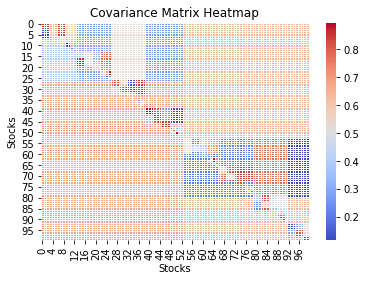

In [43]:
# Generate the heatmap
sns.heatmap(mat, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Set plot title and labels
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Stocks')
plt.ylabel('Stocks')

# Display the heatmap
plt.show()

In [41]:
import numpy as np

def generate_permuted_hcbm_mat(t_samples, n_size, rho_low=0.1, rho_high=0.9, blocks=4, depth=4):
    matrices = []

    for _ in range(t_samples):
        mat = np.zeros((n_size, n_size))
        _hcbm_mat_helper(mat, 0, n_size - 1, rho_low, rho_high, blocks, depth)
        permuted_mat = permute_matrix(mat)
        matrices.append(permuted_mat)

    return np.array(matrices)

def permute_matrix(matrix):
    n_size = matrix.shape[0]
    permutation = np.random.permutation(n_size)
    permuted_matrix = matrix[:, permutation]
    permuted_matrix = permuted_matrix[permutation, :]
    return permuted_matrix

# Example usage
t_samples = 3
n_size = 8
rho_low = 0.1
rho_high = 0.9
blocks = 4
depth = 4

permuted_hcbm_matrices = generate_permuted_hcbm_mat(t_samples, n_size, rho_low, rho_high, blocks, depth)
for matrix in permuted_hcbm_matrices:
    print(matrix)
    print()


[[0.52759394 0.         0.         0.         0.         0.
  0.         0.52759394]
 [0.88223122 0.44153236 0.69804701 0.18222341 0.69804701 0.18222341
  0.44153236 0.88223122]
 [0.         0.         0.85229707 0.         0.85229707 0.
  0.         0.        ]
 [0.88223122 0.19387456 0.69804701 0.86659234 0.69804701 0.86659234
  0.19387456 0.88223122]
 [0.         0.         0.85229707 0.         0.85229707 0.
  0.         0.        ]
 [0.88223122 0.19387456 0.69804701 0.86659234 0.69804701 0.86659234
  0.19387456 0.88223122]
 [0.88223122 0.44153236 0.69804701 0.18222341 0.69804701 0.18222341
  0.44153236 0.88223122]
 [0.52759394 0.         0.         0.         0.         0.
  0.         0.52759394]]

[[0.56445686 0.         0.56445686 0.         0.         0.
  0.         0.        ]
 [0.36120424 0.28478346 0.36120424 0.36268151 0.46152049 0.36268151
  0.28478346 0.46152049]
 [0.56445686 0.         0.56445686 0.         0.         0.
  0.         0.        ]
 [0.         0.        

In [44]:
import numpy as np

def generate_hcmb_mat(t_samples, n_size, rho_low=0.1, rho_high=0.9, blocks=4, depth=4, permute=False):
    matrices = []

    for _ in range(t_samples):
        matrix = np.zeros((n_size, n_size))
        generate_blocks(matrix, rho_low, rho_high, blocks, depth, 0, n_size - 1, 0, n_size - 1)

        if permute:
            permuted_matrix = permute_matrix(matrix)
            matrices.append(permuted_matrix)
        else:
            matrices.append(matrix)

    return np.array(matrices)

def generate_blocks(matrix, rho_low, rho_high, blocks, depth, row_start, row_end, col_start, col_end):
    if depth == 0:
        rho = np.random.uniform(rho_low, rho_high)
        matrix[row_start:row_end + 1, col_start:col_end + 1] = rho
    else:
        block_size = (row_end - row_start + 1) // blocks
        sub_size = block_size * blocks

        for i in range(blocks):
            sub_row_start = row_start + i * block_size
            sub_row_end = sub_row_start + block_size - 1

            for j in range(blocks):
                sub_col_start = col_start + j * block_size
                sub_col_end = sub_col_start + block_size - 1

                generate_blocks(matrix, rho_low, rho_high, blocks, depth - 1, sub_row_start, sub_row_end, sub_col_start, sub_col_end)
                matrix[sub_row_start:sub_row_end + 1, sub_col_start:sub_col_end + 1] = rho_low

# The permute_matrix function remains the same

# Example usage
t_samples = 3
n_size = 8
rho_low = 0.1
rho_high = 0.9
blocks = 4
depth = 4
permute = True

hcbm_matrices = generate_hcmb_mat(t_samples, n_size, rho_low, rho_high, blocks, depth, permute)
for matrix in hcbm_matrices:
    print(matrix)
    print()


[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]



In [46]:
import numpy as np

def generate_hierarchical_correlation_matrix(n_size, block_sizes, rho_low=0.1, rho_high=0.9):
    matrix = np.zeros((n_size, n_size))
    fill_diagonal_blocks(matrix, block_sizes, rho_low, rho_high)
    return matrix

def fill_diagonal_blocks(matrix, block_sizes, rho_low, rho_high):
    n_size = matrix.shape[0]
    n_levels = len(block_sizes)

    start_idx = 0
    for level in range(n_levels):
        block_size = block_sizes[level]
        n_blocks = len(block_size)
        rho_values = np.random.uniform(rho_low, rho_high, n_blocks)

        for i in range(n_blocks):
            block_start_idx = start_idx + sum(block_size[:i])
            block_end_idx = block_start_idx + block_size[i]
            matrix[block_start_idx:block_end_idx, block_start_idx:block_end_idx] = rho_values[i]

        start_idx += block_size[-1]

def permute_correlation_matrix(matrix):
    n_size = matrix.shape[0]
    permutation = np.random.permutation(n_size)
    permuted_matrix = matrix[:, permutation]
    permuted_matrix = permuted_matrix[permutation, :]
    return permuted_matrix

# Example usage
n_size = 100
block_sizes = [[4, 2], [3, 1]]
rho_low = 0.1
rho_high = 0.9

# Generate hierarchical correlation matrix
correlation_matrix = generate_hierarchical_correlation_matrix(n_size, block_sizes, rho_low, rho_high)

# Permute the correlation matrix
permuted_matrix = permute_correlation_matrix(correlation_matrix)

print("Original Correlation Matrix:")
print(correlation_matrix)
print()
print("Permuted Correlation Matrix:")
print(permuted_matrix)


Original Correlation Matrix:
[[0.6269095  0.6269095  0.6269095  ... 0.         0.         0.        ]
 [0.6269095  0.6269095  0.6269095  ... 0.         0.         0.        ]
 [0.6269095  0.6269095  0.82096446 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Permuted Correlation Matrix:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.82096446 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


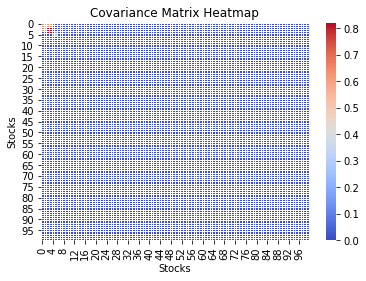

In [47]:
# Generate the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Set plot title and labels
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Stocks')
plt.ylabel('Stocks')

# Display the heatmap
plt.show()

In [ ]:
import numpy as np

def generate_diagonal_blocks(n_size, block_sizes, rho_low=0.1, rho_high=0.9):
    matrix = np.zeros((n_size, n_size))
    fill_diagonal_blocks(matrix, block_sizes, rho_low, rho_high)
    return matrix

def fill_diagonal_blocks(matrix, block_sizes, rho_low, rho_high):
    n_size = matrix.shape[0]
    n_levels = len(block_sizes)

    start_idx = 0
    for level in range(n_levels):
        block_size = block_sizes[level]
        n_blocks = len(block_size)
        rho_values = np.random.uniform(rho_low, rho_high, n_blocks)

        for i in range(n_blocks):
            block_start_idx = start_idx + sum(block_size[:i])
            block_end_idx = block_start_idx + block_size[i]
            matrix[block_start_idx:block_end_idx, block_start_idx:block_end_idx] = rho_values[i]

        start_idx += block_size[-1]

# Example usage
n_size = 100
# [100, 50, 25, 25, 25, 10, 15, 15, 5, 10, 10, 5]
# block_sizes = [[50, 25, 25], [25, 15, 5], [10, 15], [10, 10, 5]]
# block_sizes = [[50, 30, 15, 5], [25, 15, 10, 3], [12, 7, 5, 2], [6, 4, 3, 1]]
# block_sizes = [[50, 30], [20, 10], [5, 3], [2, 1]]
# block_sizes = [[64], [32], [16], [8], [4], [2]]
# block_sizes = [[64, 32, 16], [32, 16, 8], [16, 8, 4], [8, 4, 2], [4, 2, 1], [2, 1]]
# block_sizes = [[64, 32, 16], [32, 16, 8], [16, 8, 4], [8, 4, 2], [4, 2, 1], [2, 1], [1]]
# block_sizes = [[1], [2, 1], [4, 2, 1], [8, 4, 2], [16, 8, 4], [32, 16, 8], [64, 32, 16]]
# block_sizes = [[64], [32, 32], [16, 16, 16], [8, 8, 8, 8], [4, 4, 4, 4, 4]]

# block_sizes = []
# n_blocks = 3

# for level in range(6):
#     sub_block_sizes = np.random.randint(1, n_blocks + 1, n_blocks)
#     block_sizes.append(sub_block_sizes)
#     n_blocks += sub_block_sizes.sum()

block_sizes = []
n_blocks = 1

for level in range(6):
    sub_block_sizes = np.random.randint(1, n_blocks + 1, n_blocks)
    block_sizes.append(sub_block_sizes)
    n_blocks += sub_block_sizes.sum()
    n_blocks *= 2


rho_low = 0.1
rho_high = 0.9

# Generate diagonal blocks matrix
diagonal_blocks_matrix = generate_diagonal_blocks(n_size, block_sizes, rho_low, rho_high)

print(diagonal_blocks_matrix)


In [ ]:
# Generate the heatmap
sns.heatmap(diagonal_blocks_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Set plot title and labels
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Stocks')
plt.ylabel('Stocks')

# Display the heatmap
plt.show()

In [19]:
import numpy as np

def generate_diagonal_block_matrix(n_size, rho_low=0.1, rho_high=0.9, blocks=4, depth=4):
    matrix = np.zeros((n_size, n_size))
    block_sizes = generate_random_block_sizes(blocks, depth)
    _dbm_mat_helper(matrix, 0, n_size - 1, rho_low, rho_high, block_sizes)

    return matrix

def _dbm_mat_helper(mat, n_low=0, n_high=214, rho_low=0.1, rho_high=0.9, block_sizes=None):
    if block_sizes is None or len(block_sizes) == 0:
        rho = np.random.uniform(rho_low, rho_high)
        mat[n_low:n_high+1, n_low:n_high+1] = rho
    else:
        block_size = block_sizes.pop(0)
        n_mid = (n_low + n_high) // 2
        for i in range(block_size):
            n_start = n_low + i * ((n_high - n_low + 1) // block_size)
            n_end = n_start + ((n_high - n_low + 1) // block_size) - 1

            rho = np.random.uniform(rho_low, rho_high)
            mat[n_start:n_end+1, n_start:n_end+1] = rho

            _dbm_mat_helper(mat, n_start, n_end, rho_low, rho_high, block_sizes[:])

def generate_random_block_sizes(blocks, depth):
    block_sizes = []
    for _ in range(depth):
        block_size = np.random.randint(1, blocks + 1)
        block_sizes.append(block_size)
    return block_sizes

# Example usage
n_size = 100
rho_low = 0.1
rho_high = 0.9
blocks = 6
depth = 4

correlation_matrix = generate_diagonal_block_matrix(n_size, rho_low, rho_high, blocks, depth)
print(correlation_matrix)



[[0.38845986 0.38845986 0.38845986 ... 0.         0.         0.        ]
 [0.38845986 0.38845986 0.38845986 ... 0.         0.         0.        ]
 [0.38845986 0.38845986 0.38845986 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.1659718  0.65910248 0.65910248]
 [0.         0.         0.         ... 0.65910248 0.65910248 0.65910248]
 [0.         0.         0.         ... 0.65910248 0.65910248 0.65910248]]


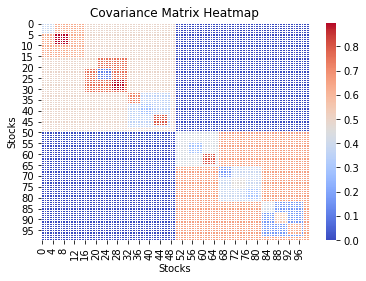

In [20]:
# Generate the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Set plot title and labels
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Stocks')
plt.ylabel('Stocks')

# Display the heatmap
plt.show()

/var/folders/6p/ftrv1h3x3rlcsvt7jhphrkz80000gn/T/ipykernel_23823/1389617361.py:19: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(np.zeros(p), C, n)


ValueError: shapes (10,) and (100,) not aligned: 10 (dim 0) != 100 (dim 0)